
<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-header-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>

# <center>  Estadística Descriptiva  </center>

## Descripción
En esta lección se revisa los conceptos asociados a la estadística descriptiva implementando código Python.

## Contenido

* Medidas de Tendencia Central
* Medidas de Dispersión
* Medidas de Posición
* Medidas de Forma
* Distribución Normal
* Covarianza y correlación

## Requisitos previos

* Haber completado el curso:
  * Introducción a Python
  * Conocimientos básicos de programación
  * Navegador web: Chrome

<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/icons/danger.png"/> **Disclaimer:** Este material ha sido preparado por el equipo de **handytec Academy®**. Se prohibe la publicación o reproducción de este material sin previa autorización de **handytec Academy®** - 2022 Todos los derechos reservados.

## Importar librerías y verificar versiones

In [3]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print('** Versiones Actuales | Requeridas **')
print('Python:\nVersion Actual:', sys.version, ' | Requerida >= 3.6')
print('NumPy:\nVersion Actual: {:10} | Requerida >= 1.16.2'.format(np.__version__))
print('Pandas:\nVersion Actual: {:10}| Requerida >= 1.0.1'.format(pd.__version__))
print('SciPy:\nVersion Actual: {:10}| Requerida >= 1.2.1'.format(scipy.__version__))
print('Matplotlib:\nVersion Actual: {:10} | Requerida >= 3.0.3'.format(matplotlib.__version__))
print('Seaborn:\nVersion Actual: {:10} |Requerida >= 0.9.0 '.format(sns.__version__))

** Versiones Actuales | Requeridas **
Python:
Version Actual: 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]  | Requerida >= 3.6
NumPy:
Version Actual: 1.21.6     | Requerida >= 1.16.2
Pandas:
Version Actual: 1.3.5     | Requerida >= 1.0.1
SciPy:
Version Actual: 1.7.3     | Requerida >= 1.2.1
Matplotlib:
Version Actual: 3.2.2      | Requerida >= 3.0.3
Seaborn:
Version Actual: 0.11.2     |Requerida >= 0.9.0 


## 1. Dataset de Trabajo

**Credit:** conjunto de datos simulados que contiene información sobre diez mil clientes de una entidad financiera

<a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Documentación de las variables </a>

**Diccionario de datos**
* ID: Código de identificación del cliente
* Income: Ingresos del cliente en $10,000's
* Limit: Límite de crédito
* Rating: Puntaje crediticio
* Cards: Número de tarjetas de crédito
* Age: Edad en años
* Education: Número de años de educación
* Gender: Masculino (Male) o Femenino (Female)
* Student: Si el cliente es estudiantes (Yes) o no lo es (No)
* Married: Si el cliente está casado (Yes) o no está (No)
* Ethnicity: Africano (African), Americano (American), Asiático (Asian) y Caucásico (Caucasian)
* Balance: Promedio del saldo de la tarjeta de crédito en dólares

In [8]:
Credit       = pd.read_csv("https://storage.googleapis.com/datasets-academy/Credit.csv")
Credit["ID"] = Credit["ID"].astype(object)

In [9]:
Credit.head(30)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [10]:
ingresos = Credit["Income"]
limite = Credit["Limit"]
type(ingresos)

pandas.core.series.Series

## 2. Medidas de Tendencia Central

Empezaremos visualizando la distribución de los ingresos por medio de un histograma. 

**Ejercicio:** Identificar las características de la distribución.

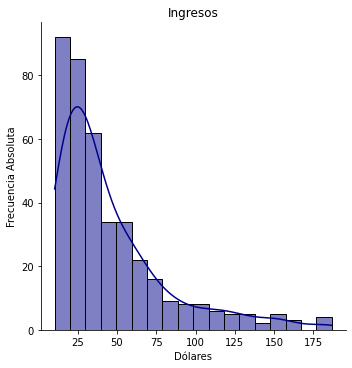

In [11]:
sns.displot(ingresos, color="darkblue", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Absoluta")
plt.show()

In [12]:
# Medidas de tendencia central
media    = ingresos.mean()
mediana  = ingresos.median()
moda     = ingresos.mode()

print('Promedio: ', media, '\nMediana: ', mediana, '\nModa: ', moda[0])

Promedio:  45.218885 
Mediana:  33.1155 
Moda:  23.793


**¿Cuál de las medidas de tendencia central resumen correctamente a los ingresos?**

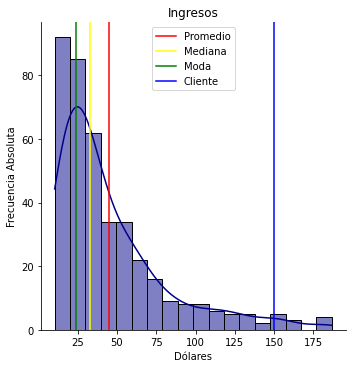

<Figure size 432x288 with 0 Axes>

In [13]:
sns.displot(ingresos, color ="darkblue", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Absoluta")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.axvline(150, color='b', label='Cliente')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/grf.jpeg')


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/cars.csv')

In [16]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


>**Ejercicio 1:** Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`

In [ ]:
#Su código aquí


### Solución

In [ ]:
print('Respuesta:')
limite = Credit['Limit']
print('Promedio:', limite.mean())
print('Mediana:', limite.median())
print('Moda:', limite.mode()[0])

Respuesta:
Promedio: 4735.6
Mediana: 4622.5
Moda: 855


## 3. Medidas de Dispersión

### Rango

In [17]:
print("El ingreso mínimo es de:", ingresos.min())
print("El ingreso máximo es de:", ingresos.max())
print("El rango es igual a:", ingresos.max()-ingresos.min())

El ingreso mínimo es de: 10.354
El ingreso máximo es de: 186.634
El rango es igual a: 176.27999999999997


### Varianza y Desviación Estándar
* El argumento ```ddof``` hace referencia al denominador: ```N-ddof```
* ```ddof=0``` si trabajamos con la población
* ```ddof=1``` si trabajamos con la muestra

ddof grados de libertad
En estadística, grados de libertad, expresión introducida por Ronald Fisher, dice que, de un conjunto de observaciones, los grados de libertad están dados por el número de valores que pueden ser asignados de forma arbitraria, antes de que el resto de las variables tomen un valor automáticamente, producto de establecerse las que son libres; esto, con el fin de compensar e igualar un resultado el cual se ha conocido previamente. Se encuentran mediante la fórmula {\displaystyle n-r}{\displaystyle n-r}, donde n es el número de sujetos en la muestra que pueden tomar un valor y r es el número de sujetos cuyo valor dependerá del que tomen los miembros de la muestra que son libres. También pueden ser representados por {\displaystyle k-r}{\displaystyle k-r}, donde {\displaystyle k}k= número de grupos; esto, cuando se realizan operaciones con grupos y no con sujetos individuales.

In [18]:
print("La varianza en la población es igual a:", ingresos.var(ddof=0))#Medida de dispersión respecto a la media
print("La desviación estandar en la población es igual a:", ingresos.std(ddof=0))

La varianza en la población es igual a: 1239.0533939567752
La desviación estandar en la población es igual a: 35.20019025455367


In [19]:
print("La varianza en la muestra es igual a:", ingresos.var(ddof=1))
print("La desviación estandar en la muestra es igual a:", ingresos.std(ddof=1))

La varianza en la muestra es igual a: 1242.1587909341104
La desviación estandar en la muestra es igual a: 35.244273165070524


La varianza de un conjunto de valores es una medida de variación igual al cuadrado de la desviación estándar. Varianza muestral: s2 el cuadrado de la desviación estándar s. Varianza poblacional: s2 el cuadrado de la desviación estándar poblacional s.



De forma predeterminada, el método ```var()``` calcula la varianza asumiendo que se trabaja con una muestra. Si no queremos utilizar el argumento ```ddof``` podemos corregir el valor por medio del siguiente truco algebráico.

In [ ]:
ingresos.var()*(len(ingresos)-1)/len(ingresos)

1239.0533939567745

>**Ejercicio 2:** Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`

In [23]:
#Su código aquí
print("El ingreso mínimo es de:", Credit['Balance'].min())
print("El ingreso máximo es de:", Credit['Balance'].max())
print("El rango es igual a:", Credit['Balance'].max()-ingresos.min())
var = Credit['Balance'].var()*(len(Credit['Balance'])-1)/len(Credit['Balance'])
print(dvest)
var = dvest**2
var

El ingreso mínimo es de: 0
El ingreso máximo es de: 1999
El rango es igual a: 1988.646
210849.779775


44457629631.166

In [22]:
balance = Credit["Balance"]
print("El rango es igual a:", balance.max()-balance.min())
print("La varianza es igual a:", balance.var())
print("La varianza es igual a:", balance.var()*(len(balance)-1)/len(balance))


El rango es igual a: 1999
La varianza es igual a: 211378.22533834586
La varianza es igual a: 210849.779775


### Solución

In [ ]:
print('Respuesta:')
saldo_tc = Credit['Balance']
print('Rango:', saldo_tc.max()-saldo_tc.min())
print('Varianza muestral:', saldo_tc.var(ddof=1))
print('Desv. estándar muestral:', saldo_tc.std(ddof=1))

Respuesta:
Rango: 1999
Varianza muestral: 211378.22533834612
Desv. estándar muestral: 459.75887738938343


## 4. Medidas de Posición
El método ```describe()``` muestra de forma predeterminada los cuartiles sin embargo, podemos requerir otras medidas de posición de acuerdo a lo que se necesite.

In [ ]:
ingresos.describe()

count    400.000000
mean      45.218885
std       35.244273
min       10.354000
25%       21.007250
50%       33.115500
75%       57.470750
max      186.634000
Name: Income, dtype: float64

In [24]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [25]:
# Percentil 50
print("El ingreso mínimo es de:", ingresos.min())
print("El ingreso máximo es de:", ingresos.max())
ingresos.quantile(0.50)

El ingreso mínimo es de: 10.354
El ingreso máximo es de: 186.634


33.1155

El argumento del método ```quantile()``` puede ser también un arreglo numérico. Utilizaremos la función ```arange``` de ```numpy``` para crear un arreglo para el cálculo de deciles

In [ ]:
np.arange(start=0.1, stop=1, step=0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
ingresos.quantile(np.arange(0.1, 1, 0.1))

0.1    14.5834
0.2    19.2088
0.3    23.7567
0.4    27.8126
0.5    33.1155
0.6    40.0754
0.7    51.9641
0.8    63.8334
0.9    92.4513
Name: Income, dtype: float64

### Rango Intercuartil (IQR)
Medida de dispersión a ser utilizada cuando se emplea la mediana como medida de tendencia central.
Se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir: $$IRQ = Q3 - Q1$$.

In [ ]:
#0 25 50 75 100
stats.iqr(ingresos)

36.4635

In [ ]:
ingresos.quantile(0.75) - ingresos.quantile(0.25)

36.4635

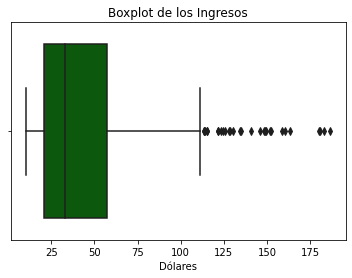

In [ ]:
sns.boxplot(x=ingresos,color = "darkgreen") 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

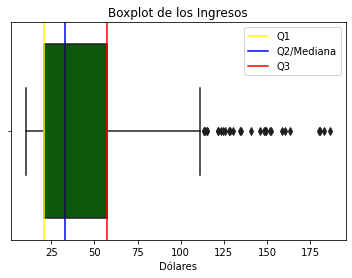

In [ ]:
sns.boxplot(x=ingresos, color="darkgreen", whis=1.5) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.axvline(ingresos.quantile(0.25), color='yellow', label='Q1')
plt.axvline(mediana, color='blue', label='Q2/Mediana')
plt.axvline(ingresos.quantile(0.75), color='red', label='Q3')
plt.legend()
plt.show()

No handles with labels found to put in legend.


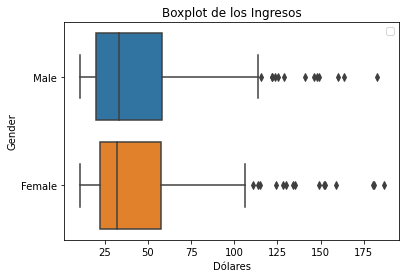

In [ ]:
sns.boxplot(x=ingresos, y=Credit["Gender"], whis=1.5) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.legend()
plt.show()

No handles with labels found to put in legend.


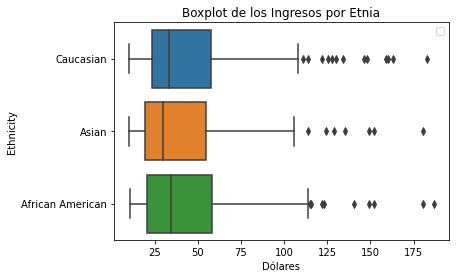

In [ ]:
sns.boxplot(x=ingresos, y=Credit["Ethnicity"]) 
plt.title("Boxplot de los Ingresos por Etnia")
plt.xlabel("Dólares")
plt.legend()
plt.show()

### Valores atípicos/extremos
Se definen como observaciones extremas a aquellas que se encuentran fuera del rango $$[Q_1-(1.5 \times IQR) ; Q_3 +(1.5 \times IQR)]$$

El Rango Intercuartil (o métrica IQR) es una medida estadística que cuantifica la dispersión de la muestra considerada, es decir, la variabilidad de la distribución de los elementos muestrales en base a algún parámetro de interés.



In [27]:
IQR  = stats.iqr(ingresos)# rango interquartil
whis = 1.5
cons = IQR * whis

print(ingresos.quantile(0.75))
print(ingresos.quantile(0.25))
print(ingresos.quantile(0.75)-ingresos.quantile(0.25))

print(cons)
#Cuartiles
Q1   = ingresos.quantile(0.25)
Q3   = ingresos.quantile(0.75)

print("El límite inferior para valores extremos es:", (Q1-cons))
print("El límite superior para valores extremos es:", (Q3+cons))

57.47075
21.00725
36.4635
54.69525
El límite inferior para valores extremos es: -33.688
El límite superior para valores extremos es: 112.166


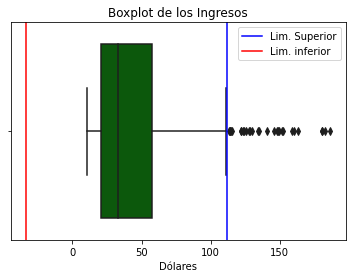

In [28]:
sns.boxplot(x=ingresos, color="darkgreen", whis=1.5) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.axvline(Q3+cons, color='blue', label='Lim. Superior')
plt.axvline(Q1-cons, color='red', label='Lim. inferior')
plt.legend()
plt.show()

>**Ejercicio 3:** Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`

In [ ]:
#Su código aquí


### Solución

In [ ]:
print('Respuesta:')
educacion = Credit['Education']
print('Quintiles:', educacion.quantile(np.arange(0.2, 1, 0.2)))
print('\nIQR Educación:', stats.iqr(educacion))

Respuesta:
Quintiles: 0.2    11.0
0.4    13.0
0.6    15.0
0.8    16.0
Name: Education, dtype: float64

IQR Educación: 5.0


## 5. Medidas de Forma
Interprete el coeficiente de asimetría y la curtosis

In [30]:
print("El coeficiente de asimetría es igual a:", ingresos.skew())
print("La curtosis es igual a:", ingresos.kurtosis())

El coeficiente de asimetría es igual a: 1.7421174049581518
La curtosis es igual a: 2.9474764313066233


Formalmente, decimos que una distribución de frecuencias es **simétrica** si la media aritmética X¯ es igual a la mediana Md. Esto significa que en cualquier otro caso, la distribución es asimétrica.

La **curtosis** de una variable estadística/aleatoria es una característica de forma de su distribución de frecuencias/probabilidad.

Según su concepción clásica, una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas),

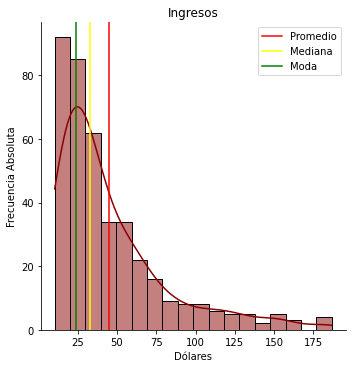

In [29]:
sns.displot(ingresos, color="darkred", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Absoluta")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.legend()
plt.show()

>**Ejercicio 4:** Obtenga el coeficiente de asimetría y la curtosis de la columna `Rating` del  DataFrame `Credit`

In [40]:
# Su código aquí
education = Credit['Education']
education.quantile(np.arange(0, 1.2, 0.2))


0.0     5.0
0.2    11.0
0.4    13.0
0.6    15.0
0.8    16.0
1.0    20.0
Name: Education, dtype: float64

In [42]:
rating = Credit['Rating']

print("El coeficiente de asimetría es igual a:", rating.skew())
print("La curtosis es igual a:", rating.kurtosis())


El coeficiente de asimetría es igual a: 0.8653935227370102
La curtosis es igual a: 1.0609469816702823


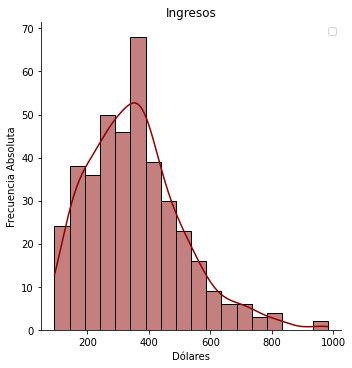

In [43]:
sns.displot(rating, color="darkred", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Absoluta")

plt.legend()
plt.show()

### Solución

In [ ]:
print('Respuesta:')
puntaje = Credit['Rating']
print('Coeficiente de asimetría:', puntaje.skew())
print('Curtosis:', puntaje.kurtosis())

Respuesta:
Coeficiente de asimetría: 0.8653935227370102
Curtosis: 1.0609469816702823


## 6. Distribución Normal

In [44]:
data = np.random.normal(0, 1, 50000)

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",stats.skew(data))
print("kurt : ",stats.kurtosis(data))

mean :  0.0045141209381979715
var  :  1.0057187723144878
skew :  0.012622344407429287
kurt :  0.03463002139109861


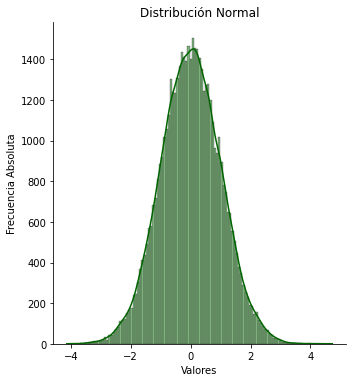

In [45]:
sns.displot(data, color="darkgreen", kde=True)
plt.title("Distribución Normal")
plt.xlabel("Valores")
plt.ylabel("Frecuencia Absoluta")
plt.show()

## 7. Covarianza y correlación

Analizar las relaciones **lineales** entre dos variables cuantitativas por medio de la covarianza y correlación.

- **Covarianza**: Nos da el signo de la relación entre dos variables, pero no podemos determinar la intensidad en la relación entre las mismas
**La covarianza mide la relación lineal entre dos variables. **
- **Coeficiente de correlación de Person**: Nos permite entender la relación entre las variables tanto su dirección (signo) e intensidad (valor). Se encuentra entre los valores de -1 y 1

In [33]:
# Matriz de varianzas y covarianzas
Credit\
.cov()\
.round(decimals=2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1242.16,64437.01,4315.49,-0.88,106.60,-3.05,7513.03
Limit,64437.01,5327781.92,356019.74,32.38,4016.95,-169.87,914445.99
Rating,4315.49,356019.74,23939.56,11.30,275.34,-14.57,61434.67
Cards,-0.88,32.38,11.30,1.88,1.02,-0.22,54.51
Age,106.60,4016.95,275.34,1.02,297.56,0.20,14.55
Education,-3.05,-169.87,-14.57,-0.22,0.20,9.77,-11.58
Balance,7513.03,914445.99,61434.67,54.51,14.55,-11.58,211378.23


In [46]:
Credit.cov().round(decimals=2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1242.16,64437.01,4315.49,-0.88,106.60,-3.05,7513.03
Limit,64437.01,5327781.92,356019.74,32.38,4016.95,-169.87,914445.99
Rating,4315.49,356019.74,23939.56,11.30,275.34,-14.57,61434.67
Cards,-0.88,32.38,11.30,1.88,1.02,-0.22,54.51
Age,106.60,4016.95,275.34,1.02,297.56,0.20,14.55
Education,-3.05,-169.87,-14.57,-0.22,0.20,9.77,-11.58
Balance,7513.03,914445.99,61434.67,54.51,14.55,-11.58,211378.23


In [47]:
# Matriz de correlaciones
Credit\
.corr()\
.round(decimals=2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.00,0.79,0.79,-0.02,0.18,-0.03,0.46
Limit,0.79,1.00,1.00,0.01,0.10,-0.02,0.86
Rating,0.79,1.00,1.00,0.05,0.10,-0.03,0.86
Cards,-0.02,0.01,0.05,1.00,0.04,-0.05,0.09
Age,0.18,0.10,0.10,0.04,1.00,0.00,0.00
Education,-0.03,-0.02,-0.03,-0.05,0.00,1.00,-0.01
Balance,0.46,0.86,0.86,0.09,0.00,-0.01,1.00


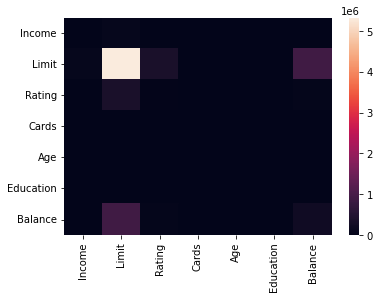

In [48]:
import seaborn as sb 
import matplotlib.pyplot as plt

dataplot = sb.heatmap(Credit.cov().round(decimals=2)) 
  
plt.show() 

**Nota Final**: Es importante comprender que la correlación no representa causalidad, analicemos algunos ejemplos: [Correlación Espuria](https://www.tylervigen.com/spurious-correlations)



<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-footer-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>